<a href="https://colab.research.google.com/github/VindiSovia/Data-Science/blob/main/03_Fire_Vindi_Sovia_Anggita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

data.groupby(['MaritalDesc', 'Sex']).agg({'Salary': ['min', 'median', 'max', 'mean']})

Salary                               
                   min   median     max          mean
MaritalDesc Sex                                      
Divorced    F    45069  59393.0   68182  57345.500000
            M    45115  63738.5  148999  72520.857143
Married     F    45433  62662.0  250000  69638.986111
            M    46120  63370.5  157000  70089.038462
Separated   F    52984  60627.0   66149  60658.888889
            M    64397  70468.0   74417  69760.666667
Single      F    45395  62068.0  220450  68988.266667
            M    46428  63055.5  178000  71340.048387
Widowed     F    45046  63303.5  107226  69719.750000
            M    52788  61359.0   67176  60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

### I found two algorithms with different coding but had the same results. in the first code, it immediately takes 'TermReason' data and then takes the 5 largest data using value count. In the second code, use a group to retrieve data from 'TermReason'. continued by carrying out an aggregate process to get the results from TermReason. There is a descending process to get the 5 biggest results.

In [ ]:
#code here (1)
data['TermReason'].value_counts().head(5)

N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64

In [ ]:
#code here (2)
df = data.groupby('TermReason').agg(total_termination = ('TermReason', 'count'))
df.sort_values(by = 'total_termination', ascending = False).head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
df = data[data['PerformanceScore'] == 'Exceeds']
df.groupby('RecruitmentSource').agg(total_recruit = ('PerformanceScore', 'count')).sort_values(by = 'total_recruit', ascending = False).head(7)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
data.groupby('Department').agg({'ManagerName': 'nunique'})

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

### For question number 5, I also found two different coding writings but had the same results. In the first code, the data is separated from the CSV file which retrieves the Sex and Termd columns. followed by group based on the column 'Sex' and ended by counting the number with normalization. In the second code, the group is based on 'sex' and continued with 'termd' ending with counting the number with normalization

In [ ]:
#code here (1)
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols=['Sex', 'Termd'])
data.groupby(['Sex']).value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
dtype: float64

In [ ]:
#code here (2)
data.groupby('Sex')['Termd'].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

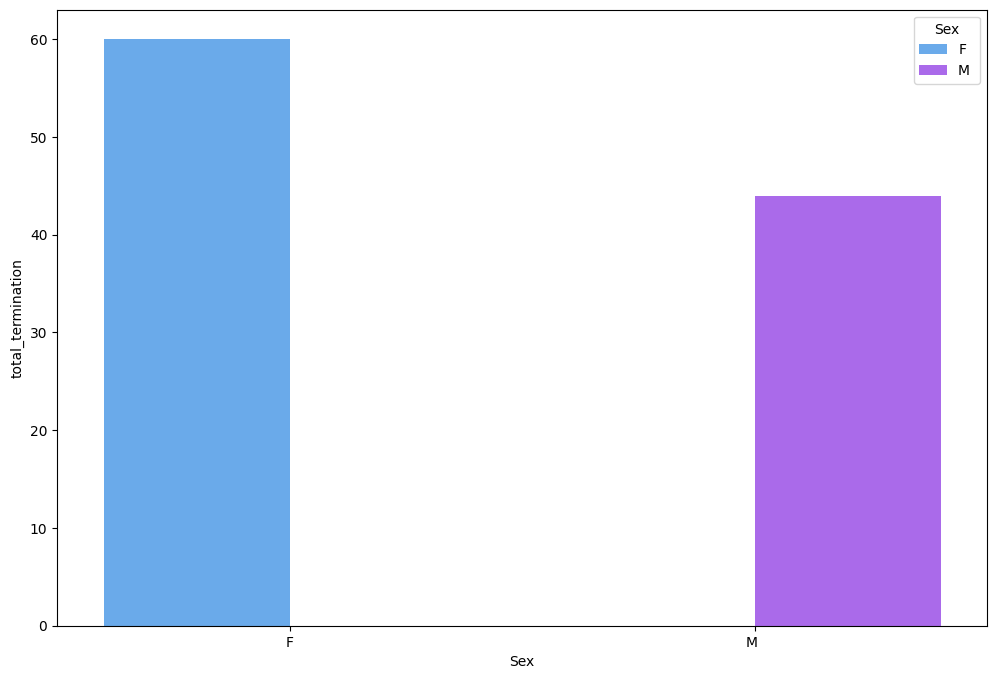

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

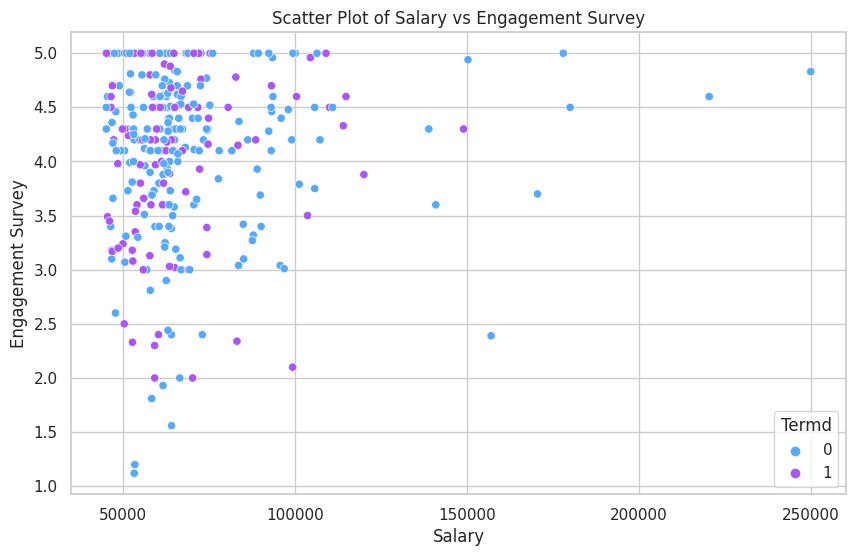

In [ ]:
#If number 6 is an error, please run the top dataset again. But don't run number 1
#code here
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data, palette='cool')

plt.title('Scatter Plot of Salary vs Engagement Survey')
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')

plt.legend(title='Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

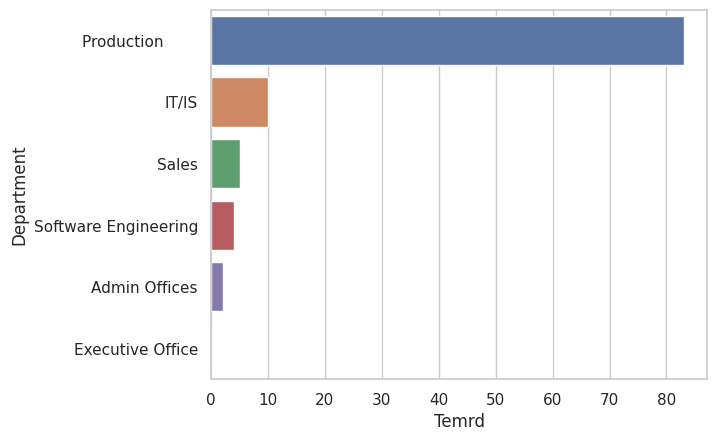

In [ ]:

df = data[data['Termd']==1]
departement_order = data['Department'].value_counts().index
sns.countplot(data=df, y='Department', order=departement_order)
plt.xlabel('Temrd')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

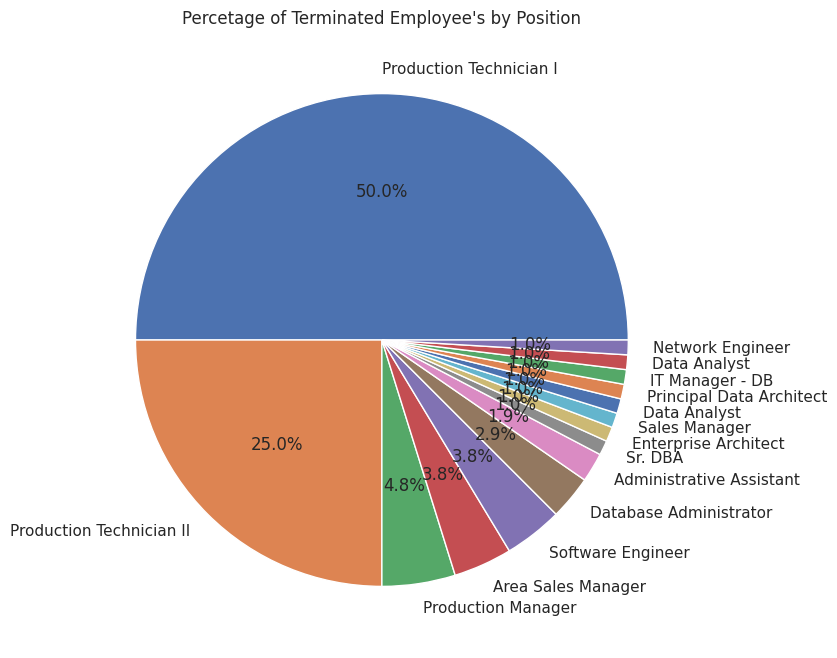

In [ ]:
#code here
terms = data[data['Termd'] == 1]['Position'].value_counts().sort_values(ascending=False)

label = terms.index.to_numpy()
value = terms.to_numpy()
plt.figure(figsize=(8, 8))
plt.pie(
    x=value,
    labels=label,
    autopct='%1.1f%%'
)
plt.title('Percetage of Terminated Employee\'s by Position')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

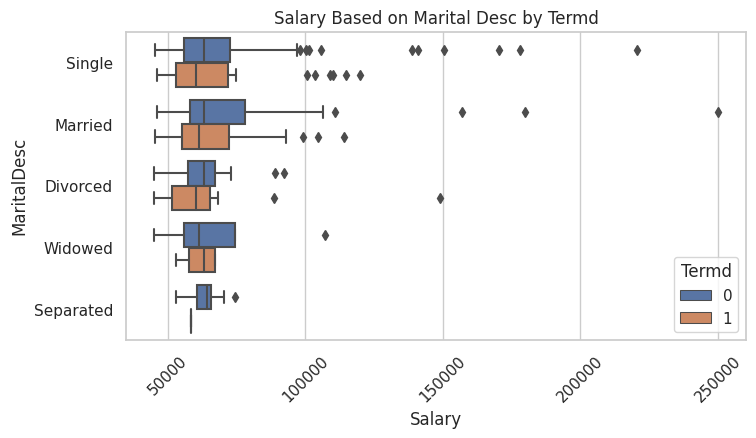

In [ ]:
#code here
plt.figure(figsize=(8, 4))

sns.boxplot(
    x='Salary',
    y='MaritalDesc',
    hue='Termd',
    data=data
)
plt.xticks(rotation=45)
plt.title('Salary Based on Marital Desc by Termd')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


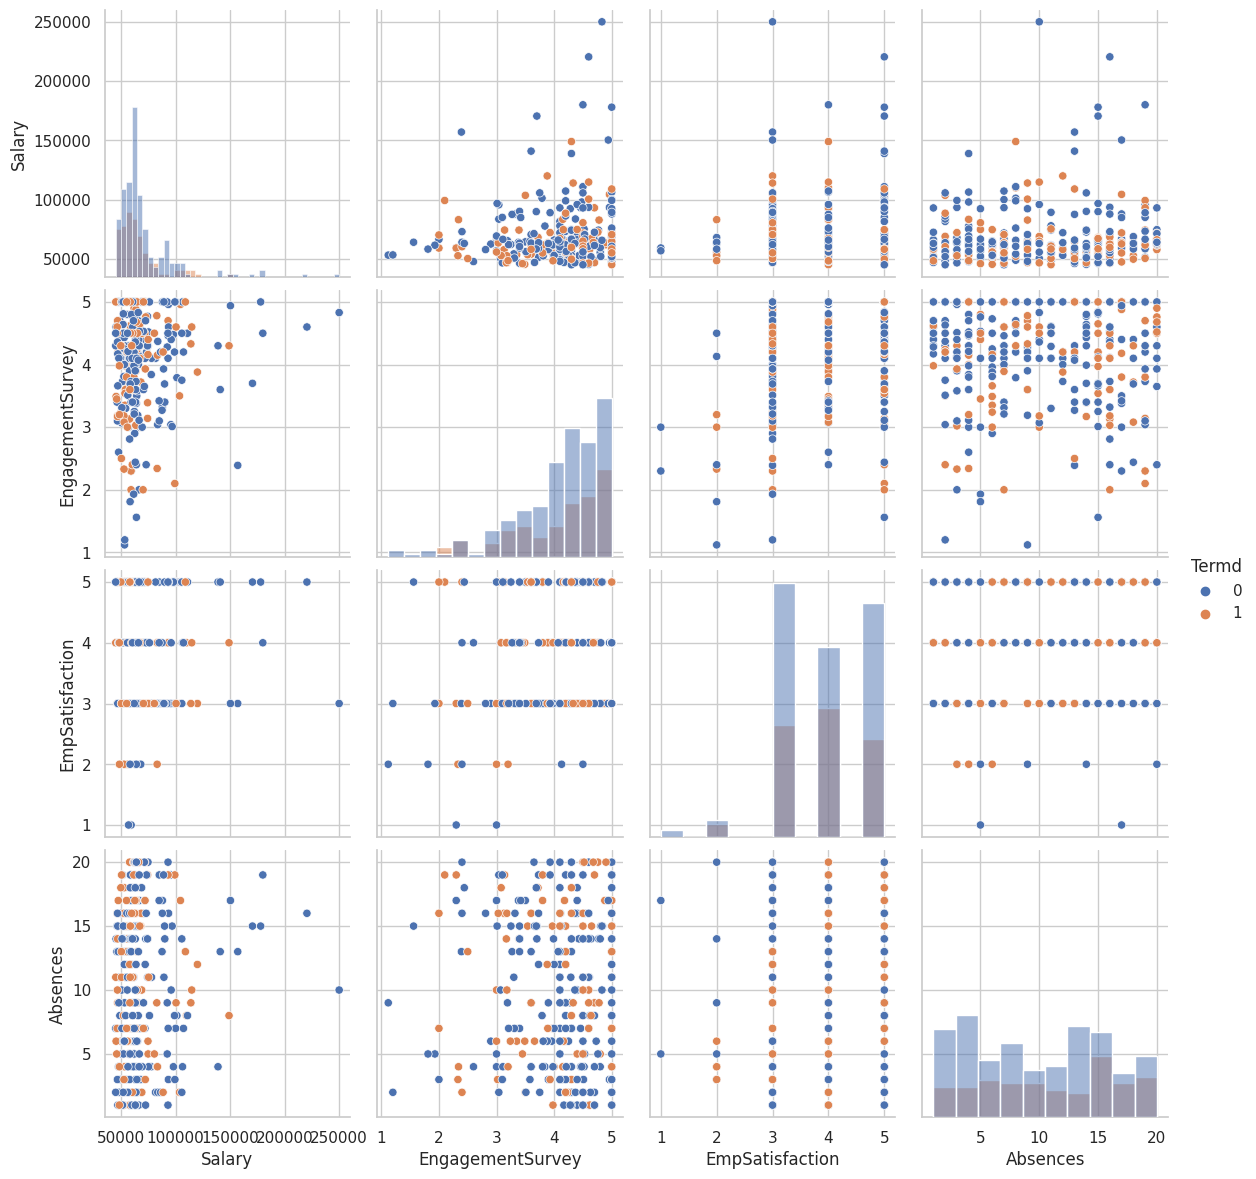

In [ ]:
#code here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

Pairplot


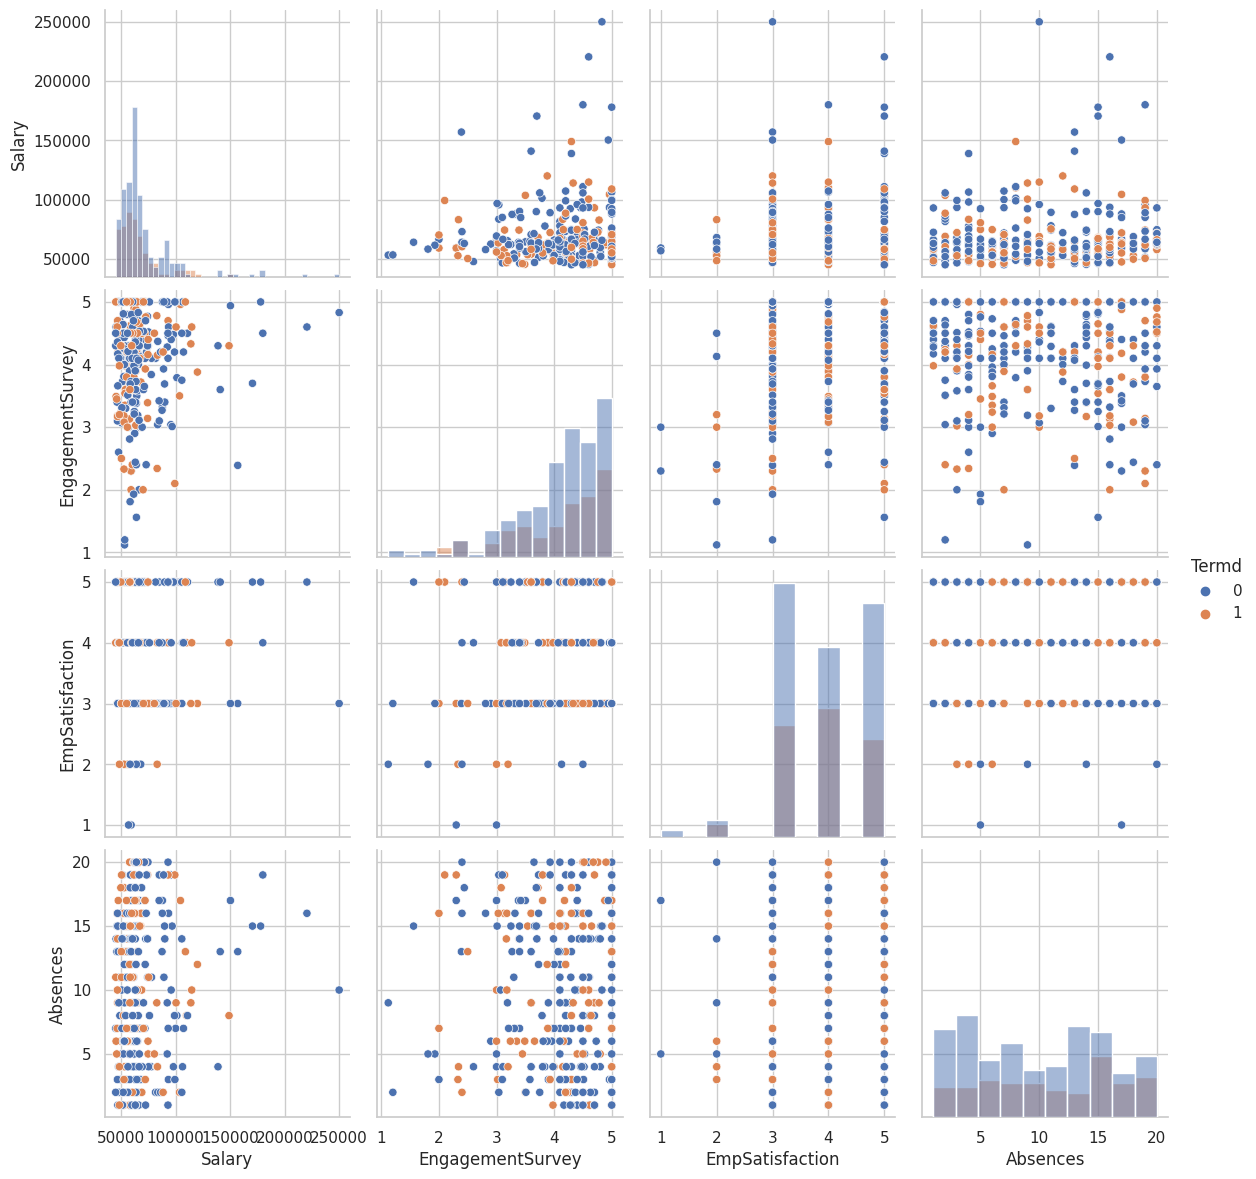

In [ ]:
#code here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
data['DOB_date'] = pd.to_datetime(data['DOB'])
data['Age'] = 2022 - data['DOB_date'].dt.year

data[['DOB', 'DOB_date', 'Age']]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data['Scaled_Salary'] = scaler.fit_transform(data[['Salary']])

data[['Salary', 'Scaled_Salary']]

,Salary,Scaled_Salary
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
data.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [ ]:
df = pd.DataFrame(data)
data_object = df.select_dtypes(include=['object']).columns
print(data_object)

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')


In [ ]:
for column in data_object:
  data[column] = data[column].astype('category')

In [ ]:
#Setelah diubah category
data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point

data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])

data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
y = data['Termd']

#Independent Variable (feature)
x = data
x.drop(['Termd'], axis=1)
x['DOB_Date']=pd.to_datetime(x['DOB'])
x['Age'] = 2022 - x['DOB_Date'].dt.year
Salary = x['Salary'].to_numpy()
salary = Salary.reshape(-1,1)
scaler = MinMaxScaler()
hasil_scale = scaler.fit_transform(salary)
x['Salary_minmax']=hasil_scale
x = x[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]
x.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
print('Dependent Variable: ')
y.head(5)

Dependent Variable: 


0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

In [ ]:
print('Independent Variable: ')
x.head(5)

Independent Variable: 


,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)

print('Train set shape (x_train, y_train): ', x_train.shape, y_train.shape)
print('Test set shape (x_test, y_test): ', x_test.shape, y_test.shape)

Train set shape (x_train, y_train):  (248, 14) (248,)
Test set shape (x_test, y_test):  (63, 14) (63,)


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

In [ ]:
#code here
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=0.0001, C=1, max_iter=1000, penalty=None)
train_model = model.fit(x_train, y_train)

y_pred = train_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 61.90%
Precision: 41.67%
Recall: 22.73%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be plac

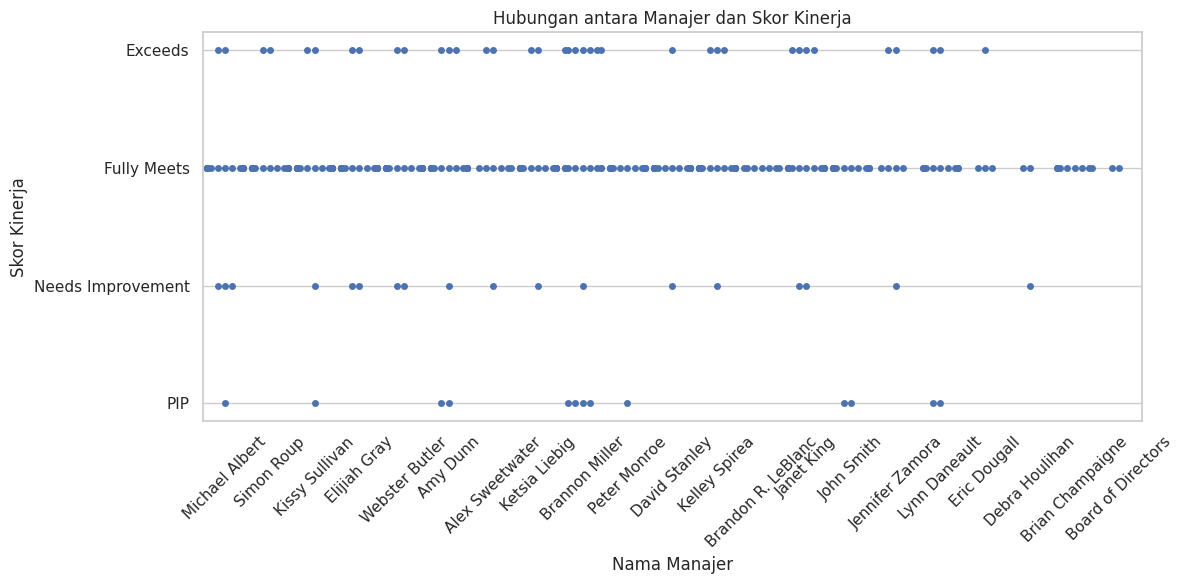

In [ ]:
#code 19
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

#Menampilkan hubungan antara manajer dan skor kinerja
plt.figure(figsize=(12, 6))
sns.swarmplot(x='ManagerName', y='PerformanceScore', data=df)
plt.xticks(rotation=45)
plt.title("Hubungan antara Manajer dan Skor Kinerja")
plt.xlabel("Nama Manajer")
plt.ylabel("Skor Kinerja")
plt.tight_layout()
plt.show()

Berdasarkan hasil yang didapatkan, terlihat bahwa hubungan antara manajer dengan performance score bahwa Fully Meets memiliki jumlah paling banyak

In [ ]:
#code 20
import pandas as pd
from scipy import stats

#Membaca dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

#Mengonversi kolom "PerformanceScore" menjadi bentuk numerik
performance_mapping = {
    'Exceeds': 5,
    'Fully Meets': 4,
    'Needs Improvement': 3,
    'PIP': 2,
    'N/A- too early to review': 1,
}

data['PerformanceScore'] = data['PerformanceScore'].map(performance_mapping)


#Menghitung skor kinerja rata-rata untuk setiap manajer
manager_performance = data.groupby('ManagerName')['PerformanceScore'].mean()

#Menggunakan uji t independen untuk memeriksa apakah ada perbedaan yang signifikan dalam skor kinerja antara manajer
managers = data['ManagerName'].unique()
p_values = []

for manager in managers:
    group1 = data[data['ManagerName'] == manager]['PerformanceScore']
    group2 = data[data['ManagerName'] != manager]['PerformanceScore']
    p_value = stats.ttest_ind(group1, group2, equal_var=False)
    p_values.append(p_value)

#Membuat DataFrame untuk hasil uji t
results = pd.DataFrame({'ManagerName': managers, 'P-Value': p_values})

#Menampilkan hasil uji t
results

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,ManagerName,P-Value
0,Michael Albert,"(-0.871352221665597, 0.39229050529304554)"
1,Simon Roup,"(1.6891758082035278, 0.10498859347724099)"
2,Kissy Sullivan,"(-0.1936917478301675, 0.8480161083985434)"
3,Elijiah Gray,"(0.2435150103981878, 0.8094217598005218)"
4,Webster Butler,"(0.23279860994927173, 0.8177794509024816)"
5,Amy Dunn,"(-0.45604783778015284, 0.6528990801359912)"
6,Alex Sweetwater,"(0.677376452318681, 0.5162570032189195)"
7,Ketsia Liebig,"(0.8270934636663436, 0.4152760992749259)"
8,Brannon Miller,"(-0.3210969364103557, 0.7511924013278182)"
9,Peter Monroe,"(-0.8578924299218846, 0.40487926541089514)"


berdasarkan hasil yang didapatakan P-value menujukan perbedaan dalam skor kinerja antara manager satu dengan manager yang lain. semakin rendah nilai nya maka terdapatnya perubahan yang signifikan dari manager tersebut.